In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
all_region_data = list()
region_dir = '/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data'
for tma in [12, 13, 21, 22]:
    data = pd.read_csv(os.path.join(region_dir, f'{tma}_region_export.txt'), sep='\t')
    all_region_data.append(data)


In [3]:
import re

pattern = r' \(C\d+\)'

for i, df in enumerate(all_region_data):
    column_mapping = {col: re.sub(pattern, '', col) for col in df.columns}
    df = df.rename(columns=column_mapping)
    all_region_data[i] = df

In [4]:
def generate_core(row):
    return f"{row['TMA']}-{int(row['row']):02d}-{row['col']}"



all_region_df = pd.concat(all_region_data)
all_region_df = all_region_df[~all_region_df['TMA core'].isna()]
all_region_df['Image'] = all_region_df['Image'].apply(lambda x: x.replace('LUNG_', ''))
all_region_df['TMA'] = all_region_df['Image'].apply(lambda x: x.split('_')[2])
all_region_df['row'] = all_region_df['TMA core'].apply(lambda x: x.split('-')[0])
all_region_df['col'] = all_region_df['TMA core'].apply(lambda x: x.split('-')[1])
all_region_df['core'] = all_region_df.apply(lambda row: generate_core(row), axis=1)
all_region_df

,Image,Object ID,Object type,Name,Classification,TMA core,Parent,ROI,Centroid X µm,Centroid Y µm,...,Num Endothelium,Num Tumour,Num Unclassifiable,Area µm^2,Perimeter µm,Length µm,TMA,row,col,core
0,ACA_TMA_12_16-0482-2-B18_FIBROBLAST_Scan1.qpti...,8149d667-affd-4e3c-ba9c-267f0f2125e7,Annotation,2af66c25-2163-4ded-bf89-139a0bac3e1b,PeriTumStroma,5-H,5-H - Annotation (StromaRegion),Geometry,5503.9,21144.5,...,233,43,336,264958.5,39795.8,NaN,12,5,H,12-05-H
1,ACA_TMA_12_16-0482-2-B18_FIBROBLAST_Scan1.qpti...,dd3a4685-2284-4fd3-ac7d-0858521785bc,Annotation,NaN,TumRegion,4-I,4-I,Geometry,3958.4,22803.6,...,155,4294,246,918868.2,35837.8,NaN,12,4,I,12-04-I
2,ACA_TMA_12_16-0482-2-B18_FIBROBLAST_Scan1.qpti...,8ee26b9c-0260-4e6e-990e-e42969c395ec,Annotation,NaN,StromaRegion,10-C,10-C,Geometry,12997.5,13862.3,...,114,83,358,284962.1,23294.9,NaN,12,10,C,12-10-C
3,ACA_TMA_12_16-0482-2-B18_FIBROBLAST_Scan1.qpti...,51e731a6-c905-439a-9543-98efdfba5a81,Annotation,NaN,BGRegion,2-D,2-D,Geometry,11632.9,25955.3,...,0,0,0,318846.3,17867.0,NaN,12,2,D,12-02-D
4,ACA_TMA_12_16-0482-2-B18_FIBROBLAST_Scan1.qpti...,af8adbd2-419f-4abc-bc78-b5ae5935f55a,Annotation,496d644e-7711-4ecf-b8c6-ec64b82e2430,PeriTumStroma,10-A,10-A - Annotation (StromaRegion),Geometry,15956.1,13818.5,...,194,23,282,228014.1,31273.3,NaN,12,10,A,12-10-A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,ACA_TMA_22_17-424-2-7_FIBROBLAST_Scan1.qptiff ...,f37b27fc-adad-4e45-ac00-2bb25a53006a,Annotation,NaN,BGRegion,10-C,10-C,Geometry,5944.4,15290.0,...,0,2,1,304355.6,17126.2,NaN,22,10,C,22-10-C
285,ACA_TMA_22_17-424-2-7_FIBROBLAST_Scan1.qptiff ...,857e7f3f-a4f3-40ff-9c93-f0006521c0b4,Annotation,NaN,BGRegion,10-D,10-D,Geometry,7504.5,14938.0,...,0,5,8,659227.1,27535.5,NaN,22,10,D,22-10-D
286,ACA_TMA_22_17-424-2-7_FIBROBLAST_Scan1.qptiff ...,d6e400a1-5d81-490f-ba8c-25abd9fb350b,Annotation,NaN,StromaRegion,11-D,11-D,Geometry,7644.8,16393.8,...,434,129,2245,751601.7,24570.6,NaN,22,11,D,22-11-D
287,ACA_TMA_22_17-424-2-7_FIBROBLAST_Scan1.qptiff ...,f38dab85-4f34-4dd2-b57e-78c604ce0916,Annotation,NaN,TumRegion,15-E,15-E,Geometry,9930.1,21972.9,...,61,601,140,126187.3,23216.8,NaN,22,15,E,22-15-E


In [5]:
all_region_df.columns.values

array(['Image', 'Object ID', 'Object type', 'Name', 'Classification',
       'TMA core', 'Parent', 'ROI', 'Centroid X µm', 'Centroid Y µm',
       'ROI: 0.50 µm per pixel: CD31: Mean',
       'ROI: 0.50 µm per pixel: CD31: Std.dev.',
       'ROI: 0.50 µm per pixel: CD31: Min',
       'ROI: 0.50 µm per pixel: CD31: Max',
       'ROI: 0.50 µm per pixel: CD31: Median',
       'ROI: 0.50 µm per pixel: FAP: Mean',
       'ROI: 0.50 µm per pixel: FAP: Std.dev.',
       'ROI: 0.50 µm per pixel: FAP: Min',
       'ROI: 0.50 µm per pixel: FAP: Max',
       'ROI: 0.50 µm per pixel: FAP: Median',
       'ROI: 0.50 µm per pixel: Podoplanin: Mean',
       'ROI: 0.50 µm per pixel: Podoplanin: Std.dev.',
       'ROI: 0.50 µm per pixel: Podoplanin: Min',
       'ROI: 0.50 µm per pixel: Podoplanin: Max',
       'ROI: 0.50 µm per pixel: Podoplanin: Median',
       'ROI: 0.50 µm per pixel: HLA-DR: Mean',
       'ROI: 0.50 µm per pixel: HLA-DR: Std.dev.',
       'ROI: 0.50 µm per pixel: HLA-DR: Min',
    

In [6]:
base_cols = ['core', 'Area µm^2', 'Classification', 'Num Detections', 'Num CD8+', 'Num CD4+', 'Num CD68+', 'Num CD20+']
measurement_cols = [col for col in all_region_df.columns if 'Mean' in col]

region_df = all_region_df[base_cols+measurement_cols]
region_df = region_df[~region_df['Classification'].isin(['BGRegion', 'PeriTumStroma'])].reset_index().drop(labels='index', axis=1)

indexes_to_drop = list()

for core in region_df['core'].unique():
    core_df = region_df[region_df['core'] == core]
    if core_df.shape[0] == 3:
        index = core_df.sort_values(by='Area µm^2', ascending=False).index[-1]
        print(core, index) 
        indexes_to_drop.append(index)
        
region_df = region_df[~region_df.index.isin(indexes_to_drop)]

region_df

12-06-C 185
12-04-C 196


,core,Area µm^2,Classification,Num Detections,Num CD8+,Num CD4+,Num CD68+,Num CD20+,ROI: 0.50 µm per pixel: CD31: Mean,ROI: 0.50 µm per pixel: FAP: Mean,...,ROI: 0.50 µm per pixel: IL6: Mean,ROI: 0.50 µm per pixel: CD105: Mean,ROI: 0.50 µm per pixel: PDL1: Mean,ROI: 0.50 µm per pixel: CXCL12: Mean,ROI: 0.50 µm per pixel: PD-1: Mean,ROI: 0.50 µm per pixel: CXCL1: Mean,ROI: 0.50 µm per pixel: Pan-Cytokeratin: Mean,ROI: 0.50 µm per pixel: PDGFR: Mean,ROI: 0.50 µm per pixel: CTGF: Mean,ROI: 0.50 µm per pixel: CXCR4: Mean
0,12-04-I,918868.2,TumRegion,4916,67,11,19,81,0.8139,0.1298,...,4.7328,0.7264,6.2915,0.0136,10.0750,0.9999,11.6459,0.0584,9.6418,1.7471
1,12-10-C,284962.1,StromaRegion,1004,35,2,38,54,0.7359,0.8000,...,4.2048,1.5309,5.5324,0.0173,6.8164,0.7630,0.2921,0.0693,5.1417,1.8063
2,12-15-B,183486.4,TumRegion,1325,28,0,14,33,0.5255,1.2982,...,4.8318,0.2936,4.1014,0.0058,6.0060,0.3716,4.3142,0.0547,4.8325,1.6793
3,12-07-F,444488.9,TumRegion,2086,18,15,247,77,0.6397,1.1740,...,8.5163,1.4675,7.7229,0.1719,11.6507,1.4982,8.3006,0.0491,14.2949,2.2853
4,12-05-I,64265.6,StromaRegion,354,1,1,34,9,1.6851,0.0870,...,15.1405,1.9812,4.7611,0.0076,6.0856,0.5998,0.4122,0.0511,5.1562,1.1436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,22-05-I,905654.1,StromaRegion,3900,297,22,198,337,0.3955,0.3860,...,3.8624,2.4960,3.5508,0.0099,9.3955,1.0458,0.2014,0.5248,13.4290,2.8322
828,22-09-A,465395.2,TumRegion,4195,14,7,261,26,0.6100,1.4238,...,3.5529,5.3590,3.0472,0.1095,12.9981,2.0326,17.5409,0.9245,29.2320,3.1597
829,22-04-E,991664.1,StromaRegion,5016,865,32,774,1008,1.2513,0.6251,...,3.6557,5.5604,4.0372,0.0323,14.9113,2.0724,0.3579,0.7922,26.0469,3.0781
830,22-11-D,751601.7,StromaRegion,4827,399,28,129,508,0.5403,0.6043,...,3.1740,2.8647,2.9171,0.0465,9.9413,1.1115,0.2859,0.5053,12.5944,2.5077


In [7]:
# region_df.to_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/cleaned_region_df_all_cores_tum_stroma.csv')

In [8]:
layered_noise_df = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/layered_neighbours_noise_df.csv', index_col=0)
layered_noise_df

,core_ID,noise,cluster,supercluster,consensus_HD_more
0,12-15-I,0.673267,NaN,"Hot, discohesive",0
1,12-15-G,0.038313,HPC 44,"Hot, cohesive",0
2,12-15-F,0.958678,NaN,"Cold, discohesive",0
3,12-15-E,0.454768,NaN,"Cold, discohesive",0
4,12-14-I,0.103106,NaN,"Cold, discohesive",0
...,...,...,...,...,...
194,22-14-A,0.262976,HPC 31,"Cold, discohesive",0
195,22-14-G,0.037216,HPC 68,"Cold, cohesive",0
196,22-14-H,0.900000,HPC 28,"Hot, discohesive",0
197,22-15-A,0.028233,HPC 50,"Hot, cohesive",0


In [9]:
def extract_marker(column_name):
    if 'ROI:' in column_name:
        # Extract the marker name using regex
        # This looks for patterns like "ROI: 0.50 µm per pixel: MARKER_NAME: Mean"
        match = re.search(r'ROI: .*?: (.*?): Mean', column_name)
        if match:
            return match.group(1)
    return column_name

# Create a dictionary mapping old column names to new ones
column_mapping = {col: extract_marker(col) for col in region_df.columns}

# Rename the columns
region_df = region_df.rename(columns=column_mapping)
region_df = region_df.drop(labels='Pan-Cytokeratin', axis=1)

In [10]:
region_df.columns.values

array(['core', 'Area µm^2', 'Classification', 'Num Detections',
       'Num CD8+', 'Num CD4+', 'Num CD68+', 'Num CD20+', 'CD31', 'FAP',
       'Podoplanin', 'HLA-DR', 'COL1A', 'SMA', 'DECORIN', 'Collagen IV',
       'LIF', 'S100A4', 'IL6', 'CD105', 'PDL1', 'CXCL12', 'PD-1', 'CXCL1',
       'PDGFR', 'CTGF', 'CXCR4'], dtype=object)

In [11]:
region_df['core'].nunique()

416

In [12]:
region_df

,core,Area µm^2,Classification,Num Detections,Num CD8+,Num CD4+,Num CD68+,Num CD20+,CD31,FAP,...,S100A4,IL6,CD105,PDL1,CXCL12,PD-1,CXCL1,PDGFR,CTGF,CXCR4
0,12-04-I,918868.2,TumRegion,4916,67,11,19,81,0.8139,0.1298,...,1.2608,4.7328,0.7264,6.2915,0.0136,10.0750,0.9999,0.0584,9.6418,1.7471
1,12-10-C,284962.1,StromaRegion,1004,35,2,38,54,0.7359,0.8000,...,2.9419,4.2048,1.5309,5.5324,0.0173,6.8164,0.7630,0.0693,5.1417,1.8063
2,12-15-B,183486.4,TumRegion,1325,28,0,14,33,0.5255,1.2982,...,2.5467,4.8318,0.2936,4.1014,0.0058,6.0060,0.3716,0.0547,4.8325,1.6793
3,12-07-F,444488.9,TumRegion,2086,18,15,247,77,0.6397,1.1740,...,3.4548,8.5163,1.4675,7.7229,0.1719,11.6507,1.4982,0.0491,14.2949,2.2853
4,12-05-I,64265.6,StromaRegion,354,1,1,34,9,1.6851,0.0870,...,0.6859,15.1405,1.9812,4.7611,0.0076,6.0856,0.5998,0.0511,5.1562,1.1436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,22-05-I,905654.1,StromaRegion,3900,297,22,198,337,0.3955,0.3860,...,1.6776,3.8624,2.4960,3.5508,0.0099,9.3955,1.0458,0.5248,13.4290,2.8322
828,22-09-A,465395.2,TumRegion,4195,14,7,261,26,0.6100,1.4238,...,4.2837,3.5529,5.3590,3.0472,0.1095,12.9981,2.0326,0.9245,29.2320,3.1597
829,22-04-E,991664.1,StromaRegion,5016,865,32,774,1008,1.2513,0.6251,...,2.7729,3.6557,5.5604,4.0372,0.0323,14.9113,2.0724,0.7922,26.0469,3.0781
830,22-11-D,751601.7,StromaRegion,4827,399,28,129,508,0.5403,0.6043,...,1.3661,3.1740,2.8647,2.9171,0.0465,9.9413,1.1115,0.5053,12.5944,2.5077


In [13]:
pure_cores_to_exclude = [
    '12-04-F', '12-05-B', '12-05-C', '12-09-C', '12-13-A',
    '13-06-J', '13-09-G', '13-10-D'
    '21-02-F', '21-04-B', '21-04-F', '21-09-C',
    '22-15-G'
]

other_cores_to_exclude = [
    '12-02-E', '12-02-J', '12-05-B', '12-09-C', '12-10-C', '12-11-C', '12-14-A',
    '13-05-F', '13-06-C', '13-07-J', '13-07-G', '13-10-A', '13-15-C',
    '21-02-B', '21-02-G', '21-03-G', '21-13-H', '21-13-J', '21-14-A', '21-14-H', '21-15-A', '21-15-E', '21-15-H',
    '22-02-A', '22-02-C', '22-02-I', '22-03-A', '22-03-B', '22-03-F', '22-04-A', '22-04-F', '22-05-F', '22-6-E', '22-09-C', '22-10-C', '22-13-I', '23-15-A', '22-15-C', '22-15-F', '22-15-G'
]

all_cores_to_exclude = pure_cores_to_exclude + other_cores_to_exclude

In [14]:
# From /nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/HPC_distribution_codex.ipynb
pure_clusters_frame = pd.read_csv('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/codex_pure_superclusters_split_HPC13.csv', index_col=0)
pure_clusters_frame = pure_clusters_frame.replace({'cold_cohesive':'Cold, cohesive', 'cold_discohesive':'Cold, discohesive', 'hot_cohesive':'Hot, cohesive', 'hot_discohesive':'Hot, discohesive'})
pure_clusters_frame

,core_ID,supercluster,cluster,consensus_HD_equal,consensus_HD_more
0,12-02-A,"Cold, discohesive",HPC 27,1,0
1,12-02-B,"Hot, cohesive",HPC 0,1,0
2,12-02-C,"Hot, cohesive",HPC 67,1,0
3,12-02-D,"Hot, discohesive",HPC 10,0,0
4,12-02-F,"Cold, cohesive",NaN,1,0
...,...,...,...,...,...
221,22-14-A,"Cold, discohesive",HPC 31,1,0
222,22-14-G,"Cold, cohesive",HPC 68,1,0
223,22-14-H,"Hot, discohesive",HPC 28,0,0
224,22-15-A,"Hot, cohesive",HPC 50,1,0


In [15]:
def assign_cohesive_phenotype(row):
    if row['supercluster'] != 'Hot, discohesive':
        return row['supercluster']
    else:
        if row['consensus_HD_equal'] == 1:
            return 'Hot, discohesive (high risk)'
        else:
            return 'Hot, discohesive (low risk)'

pure_clusters_frame['supercluster_'] = pure_clusters_frame.apply(lambda row: assign_cohesive_phenotype(row), axis=1)

In [16]:
pure_cores = pure_clusters_frame['core_ID'].unique()
pure_cores.shape[0]

226

In [17]:
pure_region_df = region_df[region_df['core'].isin(pure_cores)]
pure_region_df = pure_region_df[~pure_region_df['core'].isin(all_cores_to_exclude)]
pure_region_df = pure_region_df.merge(pure_clusters_frame[['core_ID', 'cluster', 'supercluster_']], left_on='core', right_on='core_ID').drop(labels='core_ID', axis=1)
pure_region_df = pure_region_df[pure_region_df['Classification'] == 'StromaRegion']
pure_region_df

,core,Area µm^2,Classification,Num Detections,Num CD8+,Num CD4+,Num CD68+,Num CD20+,CD31,FAP,...,CD105,PDL1,CXCL12,PD-1,CXCL1,PDGFR,CTGF,CXCR4,cluster,supercluster_
1,12-04-I,138013.1,StromaRegion,905,146,7,43,133,1.4556,0.1593,...,1.1402,4.7200,0.0054,6.5582,0.7161,0.0391,6.4880,1.0863,HPC 11,"Cold, cohesive"
3,12-07-F,382668.2,StromaRegion,1422,60,15,213,189,0.8438,1.2663,...,1.4330,6.6210,0.2593,9.1424,1.0355,0.0293,9.9278,1.8017,HPC 61,"Hot, discohesive (low risk)"
4,12-03-F,223541.6,StromaRegion,856,22,3,83,19,0.3841,0.2253,...,0.6825,5.0450,0.0072,6.0030,0.5129,0.0245,6.2189,1.3642,HPC 30,"Cold, discohesive"
7,12-14-I,486370.9,StromaRegion,2619,72,28,76,851,0.6800,0.1474,...,0.5354,3.7862,0.0050,5.1953,0.6284,0.0557,7.3158,0.8997,NaN,"Cold, discohesive"
9,12-09-F,1045566.6,StromaRegion,2580,619,5,12,167,0.8359,0.1261,...,0.4580,8.1245,0.0129,9.0714,0.8168,0.0504,6.9227,1.9709,HPC 64,"Cold, discohesive"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,22-10-E,813395.5,StromaRegion,7701,369,81,2262,2576,0.7088,1.2051,...,6.9006,5.4164,0.0326,13.5318,1.9012,1.2125,25.8844,3.6973,NaN,"Hot, discohesive (low risk)"
372,22-04-C,660249.1,StromaRegion,3208,23,3,39,12,0.3374,0.8913,...,4.2508,3.4447,0.0148,9.3591,1.2916,0.4350,17.1628,2.6733,NaN,"Cold, cohesive"
375,22-11-D,751601.7,StromaRegion,4827,399,28,129,508,0.5403,0.6043,...,2.8647,2.9171,0.0465,9.9413,1.1115,0.5053,12.5944,2.5077,HPC 69,"Hot, discohesive (low risk)"
376,22-07-H,316049.4,StromaRegion,2129,39,15,725,291,0.7148,0.6545,...,3.4352,3.5221,0.0111,12.1746,1.3284,0.4759,13.1672,2.9218,HPC 13,"Hot, discohesive (high risk)"


In [18]:
pure_region_df['supercluster_'].value_counts()

Cold, cohesive                  52
Hot, discohesive (low risk)     48
Hot, cohesive                   42
Cold, discohesive               41
Hot, discohesive (high risk)     7
Name: supercluster_, dtype: int64

### Raw intensity measurements by supercluster

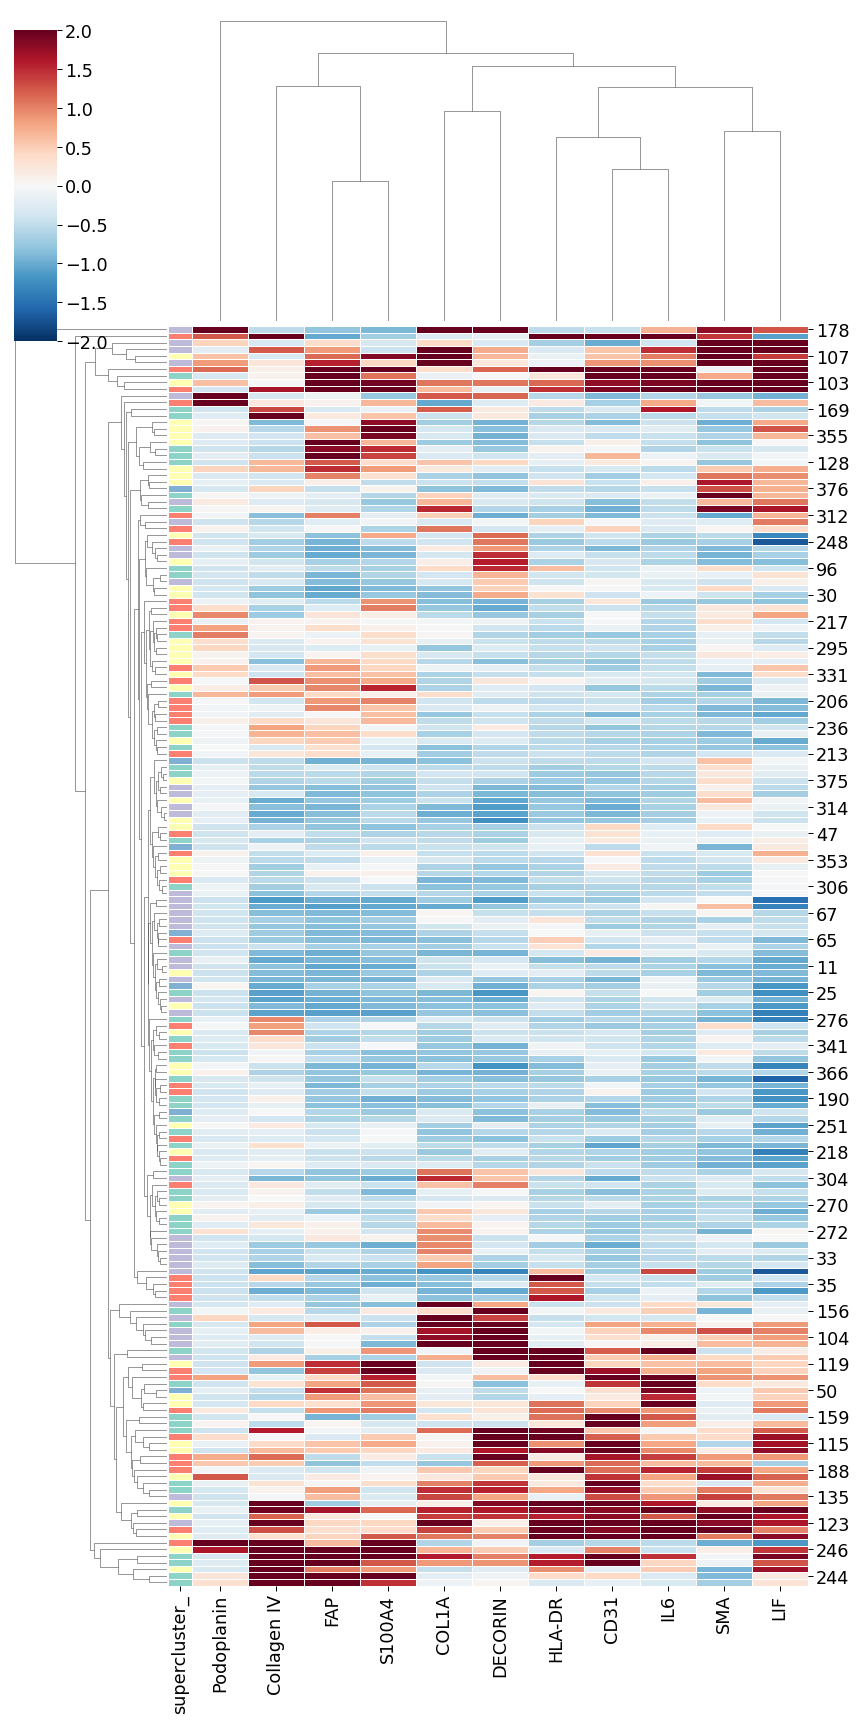

In [19]:
# marker_cols = [col for col in pure_region_df.columns if col not in base_cols+['cluster', 'supercluster_']]
marker_cols = ['CD31', 'FAP', 'Podoplanin', 'HLA-DR', 'COL1A', 'PDL1', 'PD-1', 'SMA', 'DECORIN', 'Collagen IV', 'LIF', 'S100A4', 'IL6']
marker_cols = ['CD31', 'FAP', 'Podoplanin', 'HLA-DR', 'COL1A', 'SMA', 'DECORIN', 'Collagen IV', 'LIF', 'S100A4', 'IL6']
# marker_cols = ['CD31', 'FAP', 'Podoplanin', 'HLA-DR', 'COL1A', 'PDL1', 'PD-1', 'SMA', 'DECORIN', 'Collagen IV', 'LIF', 'S100A4', 'IL6'] + base_cols + ['cluster', 'supercluster_']
col_palette = sns.color_palette('Set3', len(pure_region_df['supercluster_'].unique()))
col_dict = dict(zip(pure_region_df['supercluster_'].unique(), col_palette))
col_colors = pd.Series(pure_region_df['supercluster_'], index=pure_region_df.index).map(col_dict)

sns.set_context("paper", font_scale=2.0)
sns.clustermap(pure_region_df[marker_cols], 
               linewidth=.5,
               cmap='RdBu_r',
               z_score=1,
               vmin=-2, vmax=2,
               row_colors=col_colors,
               figsize=(12,24))

In [20]:
mean_supercluster_stroma_intensity = pure_region_df.groupby('supercluster_').agg('mean')[marker_cols]
# mean_supercluster_stroma_intensity = pure_region_df.groupby('supercluster').agg('mean')[[col for col in pure_region_df.columns if col not in base_cols+['cluster', 'supercluster']]]
mean_supercluster_stroma_intensity

/tmp/ipykernel_2125771/1156185722.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_supercluster_stroma_intensity = pure_region_df.groupby('supercluster_').agg('mean')[marker_cols]


,CD31,FAP,Podoplanin,HLA-DR,COL1A,SMA,DECORIN,Collagen IV,LIF,S100A4,IL6
supercluster_,,,,,,,,,,,
"Cold, cohesive",1.404529,1.342252,0.296660,13.936894,1.356329,3.641688,8.734027,5.789167,5.269973,3.184990,7.900729
"Cold, discohesive",0.914293,0.647529,0.628305,13.015051,1.935549,5.606651,9.143080,2.849602,5.286217,1.506193,7.165259
"Hot, cohesive",1.480776,1.193514,0.663138,20.372714,0.976660,4.167688,7.467117,5.114679,5.245881,3.920386,10.192960
"Hot, discohesive (high risk)",0.856929,0.768186,0.191743,9.992929,0.821629,3.868914,4.547657,3.293657,5.252657,2.233043,8.063629
"Hot, discohesive (low risk)",1.348431,1.365348,0.469410,14.673258,1.089006,4.631035,7.720983,4.318052,5.920890,4.246967,7.761298


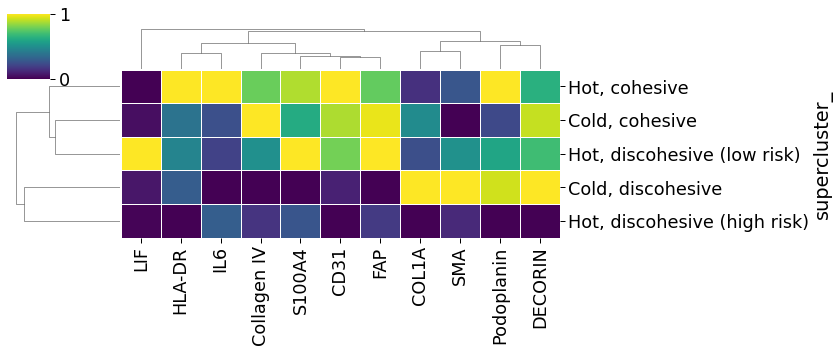

In [21]:
sns.set_context("paper", font_scale=2.0)
sns.clustermap(mean_supercluster_stroma_intensity, 
               linewidth=.5,
               cmap='viridis',
               standard_scale=1,
               figsize=(12,5))

### Normalised measurements by supercluster

In [22]:
def normalise_by_tma(df, tma_col, marker_cols):
    tmas = df[tma_col].unique()
    for tma in tmas:
        tma_subset = df[df[tma_col] == tma]
        indexes = tma_subset.index
        for marker in marker_cols:
            norm_scores = stats.zscore(tma_subset[marker].values)
            df.loc[indexes, marker] = norm_scores
    
    return df

pure_region_df_ = pure_region_df.copy(deep=True)
pure_region_df_['TMA'] = pure_region_df_['core'].apply(lambda x: x.split("-")[0])

norm_pure_region_df = normalise_by_tma(pure_region_df_, 'TMA', marker_cols)
norm_pure_region_df = norm_pure_region_df.drop(labels='TMA', axis=1)

In [23]:
norm_pure_region_df = norm_pure_region_df[norm_pure_region_df['Classification'] == 'StromaRegion']

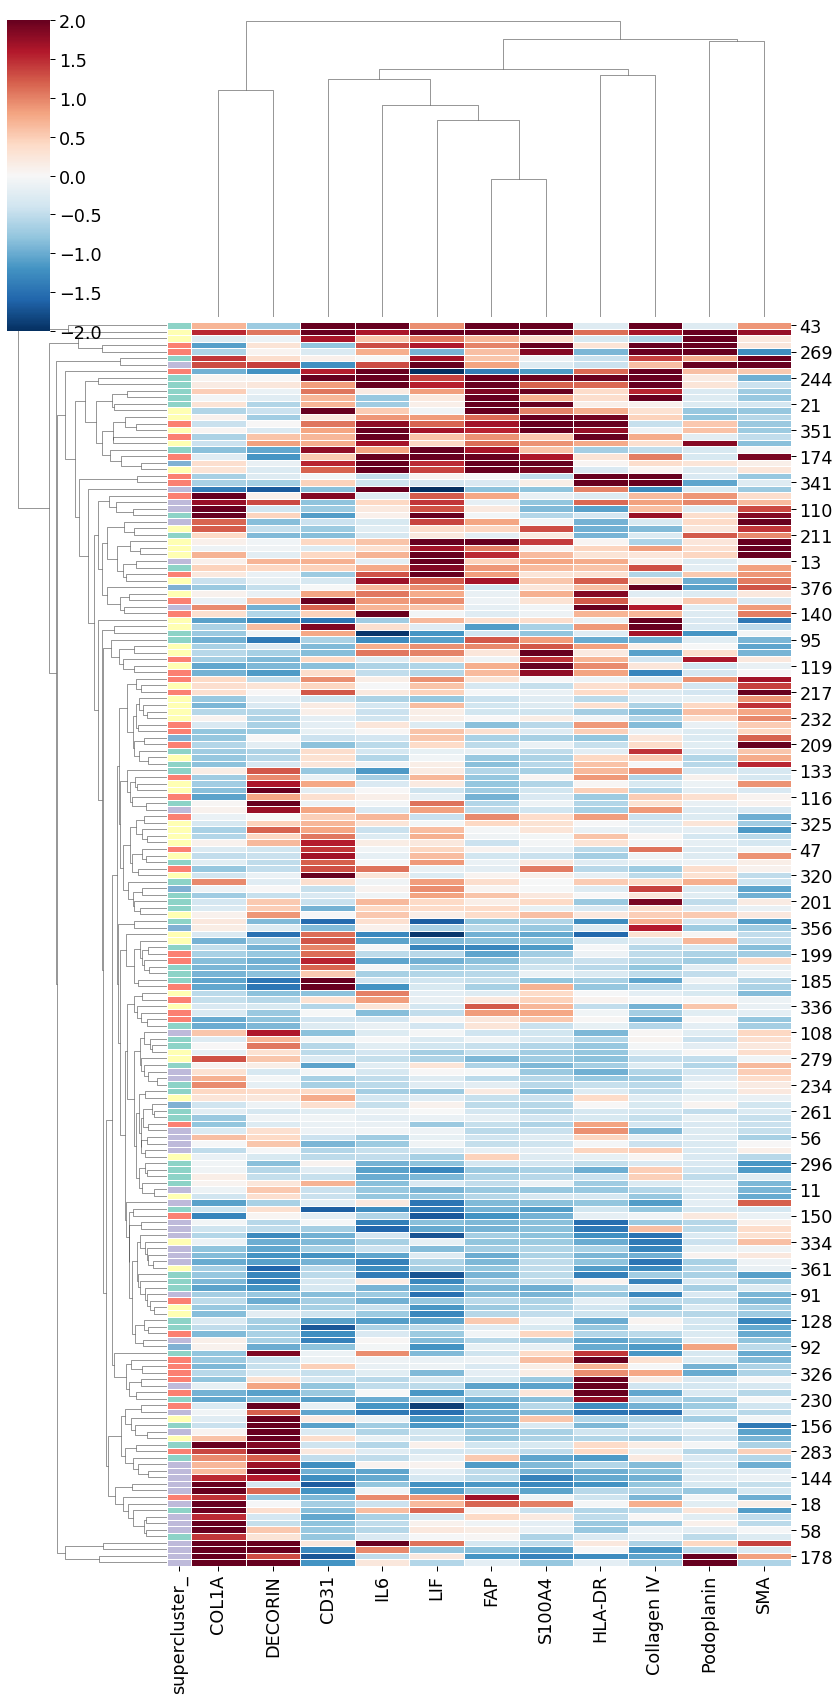

In [24]:
col_palette = sns.color_palette('Set3', len(norm_pure_region_df['supercluster_'].unique()))
col_dict = dict(zip(norm_pure_region_df['supercluster_'].unique(), col_palette))
col_colors = pd.Series(norm_pure_region_df['supercluster_'], index=norm_pure_region_df.index).map(col_dict)

sns.set_context("paper", font_scale=2.0)
sns.clustermap(norm_pure_region_df[marker_cols], 
               linewidth=.5,
               cmap='RdBu_r',
            #    z_score=1,
               vmin=-2, vmax=2,
               row_colors=col_colors,
               figsize=(12,24))

/tmp/ipykernel_2125771/954152672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  norm_mean_supercluster_stroma_intensity = norm_pure_region_df.groupby('supercluster_').agg('mean')[marker_cols]


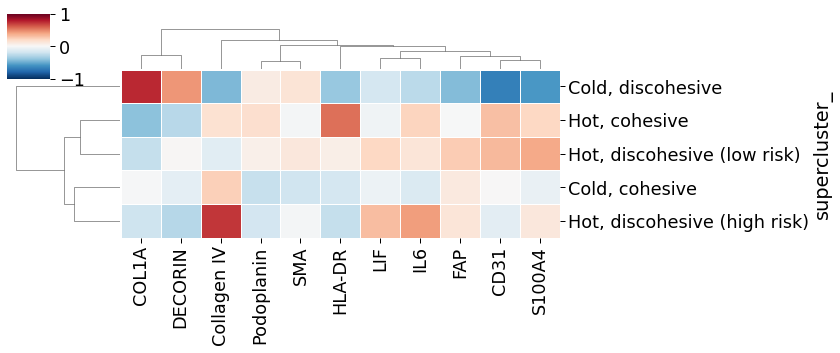

In [25]:
norm_mean_supercluster_stroma_intensity = norm_pure_region_df.groupby('supercluster_').agg('mean')[marker_cols]
# norm_mean_supercluster_stroma_intensity = norm_pure_region_df.groupby('supercluster').agg('mean')[[col for col in norm_pure_region_df.columns if col not in base_cols+['cluster', 'supercluster', 'CD8_density']]]

sns.set_context("paper", font_scale=2.0)
sns.clustermap(norm_mean_supercluster_stroma_intensity, 
               linewidth=.5,
               cmap='RdBu_r',
               vmin=-1, vmax=1,
            #    standard_scale=1,
               figsize=(12,5))

In [26]:
def enrichment_test_by_phenotype(data, phenotype_cols, meta_col, p_th=0.05):
    results = list()
    overall_avg = data.mean(numeric_only=True, axis=0)

    for group in data[meta_col].unique():
        for phenotype in phenotype_cols:
            positive_group = data[data[meta_col] == group][phenotype].values
            negative_group = data[data[meta_col] != group][phenotype].values
            statistic, p_value = stats.mannwhitneyu(positive_group, negative_group, alternative='two-sided')
            # relative_change = np.mean(positive_group)
            # relative_change = (np.mean(positive_group) - np.mean(negative_group)) / (abs(np.mean(negative_group)) + 0.001)
            relative_change = np.mean(positive_group) - overall_avg.loc[phenotype]

            results.append({
                'Supercluster':group,
                'marker':phenotype,
                'relative change':relative_change,
                'statistic':statistic,
                'p_val': p_value
            })

    results = pd.DataFrame(results)
    results['p_adj'] = stats.false_discovery_control(results['p_val'], method='bh')
    change_data = results.pivot(index='Supercluster', columns='marker', values='relative change')
    pval_data = results.pivot(index='Supercluster', columns='marker', values='p_adj')

    significant_mask = pval_data < p_th
    annot_text = change_data.applymap('{:.2f}'.format)
    annot_text = annot_text.mask(significant_mask, '*')
    annot_text = annot_text.mask(~significant_mask, ' ')

    return change_data, annot_text, results

In [27]:
change_data, annot_text, results = enrichment_test_by_phenotype(norm_pure_region_df[norm_pure_region_df['Classification'] == 'StromaRegion'], phenotype_cols=marker_cols, meta_col='supercluster_')

In [28]:
change_data

marker,CD31,COL1A,Collagen IV,DECORIN,FAP,HLA-DR,IL6,LIF,Podoplanin,S100A4,SMA
Supercluster,,,,,,,,,,,
"Cold, cohesive",0.006066,-0.013631,0.237550,-0.099096,0.094699,-0.177237,-0.142716,-0.060365,-0.227979,-0.072467,-0.198354
"Cold, discohesive",-0.679766,0.757668,-0.449837,0.441675,-0.437411,-0.378439,-0.269407,-0.174774,0.081545,-0.583063,0.138137
"Hot, cohesive",0.302586,-0.412346,0.154130,-0.276511,-0.000243,0.551750,0.225995,-0.044633,0.166004,0.208440,-0.017605
"Hot, discohesive (high risk)",-0.103352,-0.204966,0.712930,-0.282218,0.131732,-0.239637,0.417278,0.309494,-0.184069,0.111815,-0.017318
"Hot, discohesive (low risk)",0.324371,-0.241715,-0.111943,0.013194,0.252033,0.067423,0.126130,0.208600,0.058914,0.377847,0.114821


In [29]:
results

,Supercluster,marker,relative change,statistic,p_val,p_adj
0,"Cold, cohesive",CD31,0.006066,3579.0,9.799347e-01,0.983238
1,"Cold, cohesive",FAP,0.094699,3825.0,4.840623e-01,0.708666
2,"Cold, cohesive",Podoplanin,-0.227979,2984.0,7.414685e-02,0.226560
3,"Cold, cohesive",HLA-DR,-0.177237,3003.0,8.372202e-02,0.242353
4,"Cold, cohesive",COL1A,-0.013631,3696.0,7.504216e-01,0.955557
5,"Cold, cohesive",SMA,-0.198354,2887.5,3.833614e-02,0.131780
6,"Cold, cohesive",DECORIN,-0.099096,3344.0,4.712195e-01,0.708666
7,"Cold, cohesive",Collagen IV,0.237550,4300.0,3.526788e-02,0.129316
8,"Cold, cohesive",LIF,-0.060365,3392.0,5.629481e-01,0.774054
9,"Cold, cohesive",S100A4,-0.072467,3354.0,4.896240e-01,0.708666


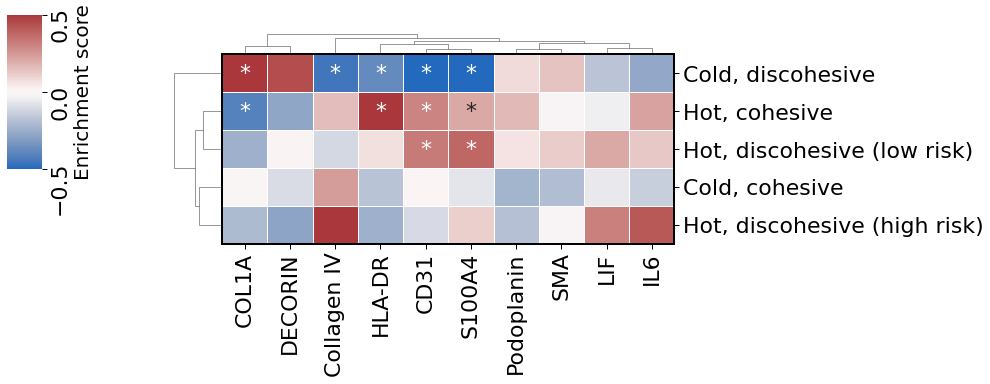

In [30]:
from matplotlib.patches import Rectangle
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42


change_data.columns.name = ""
change_data.index.name = ""

change_data = change_data[['CD31', 'Podoplanin', 'HLA-DR', 'COL1A', 'SMA', 'DECORIN', 'Collagen IV', 'LIF', 'S100A4', 'IL6']]
annot_text = annot_text[['CD31', 'Podoplanin', 'HLA-DR', 'COL1A', 'SMA', 'DECORIN', 'Collagen IV', 'LIF', 'S100A4', 'IL6']]
sns.set_context("paper", font_scale=2.5)

g = sns.clustermap(change_data,
               vmin=-0.5, vmax=0.5,
               linewidth=.5,
               cbar_kws={'label':'Enrichment score'},
               cbar_pos=(-.16, .59, .04, .39),
               dendrogram_ratio=(.1, .1),
               cmap='vlag',
               annot=annot_text,
               annot_kws={'fontsize':'22'},
               fmt='',
               figsize=(12,5.5))

g.ax_heatmap.collections[0].colorbar.set_label("Enrichment score", fontsize=20)
g.ax_heatmap.collections[0].set_linewidth(.5)

n_rows, n_cols = change_data.shape

rect = Rectangle(
    xy=(0, 0),  # Lower left corner
    width=n_cols,
    height=n_rows,
    fill=False,
    edgecolor='black',
    linewidth=2,
    clip_on=False
)
g.ax_heatmap.add_patch(rect)
g.cax.tick_params(labelrotation=90)


# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_diff_of_mean_intensities_HPC13_rot_cbar_labs.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_diff_of_mean_intensities_HPC13_rot_cbar_labs.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [116]:
pure_region_df[pure_region_df['supercluster_'] == 'Hot, discohesive (high risk)']

,core,Area µm^2,Classification,Num Detections,Num CD8+,Num CD4+,Num CD68+,Num CD20+,CD31,FAP,...,CD105,PDL1,CXCL12,PD-1,CXCL1,PDGFR,CTGF,CXCR4,cluster,supercluster_
49,12-09-E,499553.9,StromaRegion,1682,162,53,200,167,0.7608,0.6257,...,1.2500,8.8778,0.0216,10.0897,0.9080,0.0924,8.9591,2.1563,HPC 13,"Hot, discohesive (high risk)"
50,12-03-D,510111.6,StromaRegion,2908,60,13,355,12,1.6098,2.6296,...,4.4411,8.1104,0.1687,11.7317,1.9947,0.0984,16.4352,2.8093,HPC 13,"Hot, discohesive (high risk)"
63,12-11-F,1016623.0,StromaRegion,5659,688,37,533,1414,1.0991,0.2543,...,0.9178,6.7857,0.0352,8.7896,1.1837,0.1474,8.4629,1.4975,NaN,"Hot, discohesive (high risk)"
85,12-14-G,438739.6,StromaRegion,2563,8,32,63,148,0.7751,0.1743,...,1.2805,6.3791,0.0050,7.5455,0.8247,0.0550,8.8070,1.3268,HPC 13,"Hot, discohesive (high risk)"
92,12-14-C,287517.0,StromaRegion,1600,94,3,47,92,0.6154,0.4828,...,0.5778,4.7811,0.0049,5.3853,0.5746,0.0371,4.9370,1.4312,HPC 13,"Hot, discohesive (high risk)"
356,22-03-D,412322.5,StromaRegion,1739,305,3,124,26,0.4235,0.5561,...,3.5186,4.5387,0.0235,9.8030,1.1262,0.3090,14.9015,2.6871,HPC 13,"Hot, discohesive (high risk)"
376,22-07-H,316049.4,StromaRegion,2129,39,15,725,291,0.7148,0.6545,...,3.4352,3.5221,0.0111,12.1746,1.3284,0.4759,13.1672,2.9218,HPC 13,"Hot, discohesive (high risk)"


In [61]:
dir(g.ax_cbar)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbar',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_

In [62]:
g.ax_cbar.text

<bound method Axes.text of <Axes: ylabel='Enrichment   \nscore'>>

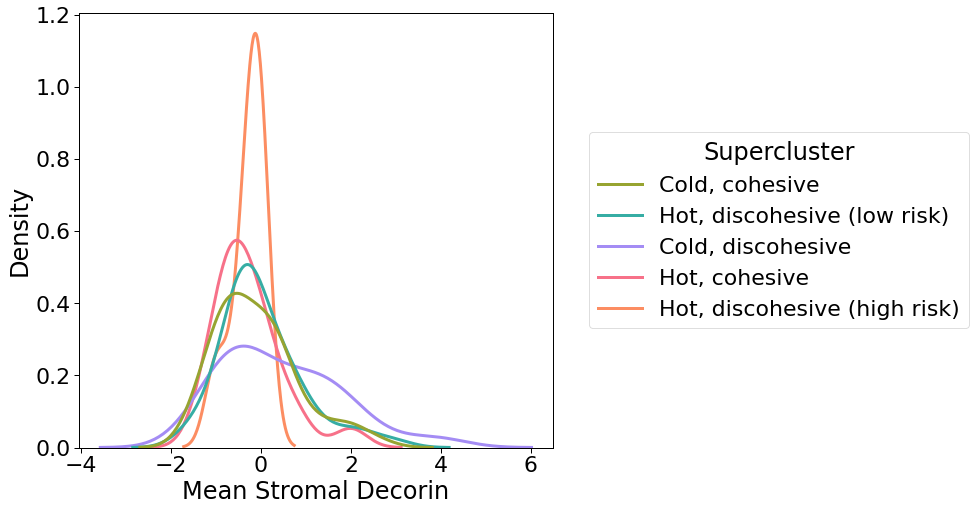

In [117]:
sns.set_context("paper", font_scale=2.5)
fig, ax = plt.subplots(figsize=(8.5,8))

sns.kdeplot(norm_pure_region_df[norm_pure_region_df['Classification'] == 'StromaRegion'], x = 'DECORIN', hue='supercluster_', common_norm=False, lw=3, palette={'Hot, cohesive':(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
                         'Hot, discohesive (low risk)':(0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
                         'Cold, cohesive':(0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
                         'Cold, discohesive':(0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
                         'Hot, discohesive (high risk)':(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)}, ax=ax)
ax.set_xlabel('Mean Stromal Decorin')
sns.move_legend(ax, title='Supercluster', loc='right', bbox_to_anchor=(1.9, 0.5))

plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_DCN_KDE_by_supercluster_split_HPC13.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_DCN_KDE_by_supercluster_split_HPC13.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

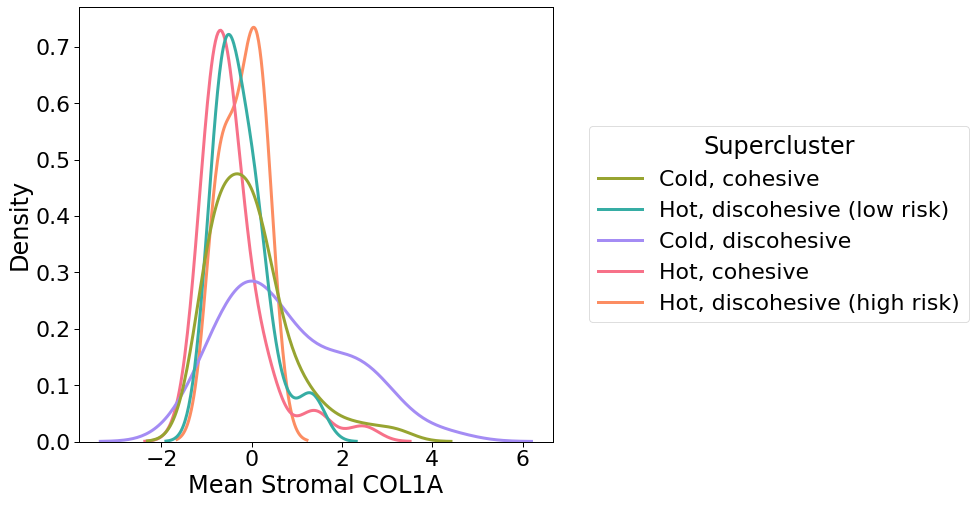

In [119]:
fig, ax = plt.subplots(figsize=(8.5,8))

sns.kdeplot(norm_pure_region_df[norm_pure_region_df['Classification'] == 'StromaRegion'], x = 'COL1A', hue='supercluster_', common_norm=False, lw=3, palette={'Hot, cohesive':(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
                         'Hot, discohesive (low risk)':(0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
                         'Cold, cohesive':(0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
                         'Cold, discohesive':(0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
                         'Hot, discohesive (high risk)':(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)}, ax=ax)
ax.set_xlabel('Mean Stromal COL1A')
sns.move_legend(ax, title='Supercluster', loc='right', bbox_to_anchor=(1.9, 0.5))

plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_COL1A_KDE_by_supercluster_split_HPC13.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_COL1A_KDE_by_supercluster_split_HPC13.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Correlation with cell density -- whole dataset

In [120]:
filtered_region_df = region_df[~region_df['core'].isin(all_cores_to_exclude)]
filtered_region_df = filtered_region_df[filtered_region_df['Classification'] == 'StromaRegion']
filtered_region_df

,core,Area µm^2,Classification,Num Detections,Num CD8+,Num CD4+,Num CD68+,Num CD20+,CD31,FAP,...,S100A4,IL6,CD105,PDL1,CXCL12,PD-1,CXCL1,PDGFR,CTGF,CXCR4
4,12-05-I,64265.6,StromaRegion,354,1,1,34,9,1.6851,0.0870,...,0.6859,15.1405,1.9812,4.7611,0.0076,6.0856,0.5998,0.0511,5.1562,1.1436
5,12-03-F,223541.6,StromaRegion,856,22,3,83,19,0.3841,0.2253,...,0.7028,7.3027,0.6825,5.0450,0.0072,6.0030,0.5129,0.0245,6.2189,1.3642
6,12-06-C,166845.2,StromaRegion,352,19,21,21,75,1.2998,0.7060,...,2.8943,5.1710,0.5776,7.6372,0.0152,9.5112,0.9613,0.1128,9.8017,1.5793
10,12-13-D,62973.5,StromaRegion,338,4,2,48,15,0.9979,0.5314,...,1.4374,4.2377,1.6061,4.8994,0.0203,5.8318,0.8647,0.0988,6.2554,1.3916
14,12-15-C,339732.0,StromaRegion,1975,112,14,25,387,0.7967,0.7999,...,2.5487,4.0601,1.2034,5.3352,0.0129,7.0462,0.8486,0.0665,7.6982,1.6526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,22-05-J,196490.5,StromaRegion,1340,30,17,103,51,1.6601,0.7553,...,2.0517,4.5528,4.3450,2.9589,0.0284,9.9983,1.4800,0.6992,17.3995,2.1305
826,22-03-I,403568.9,StromaRegion,2980,394,26,304,1134,0.9131,1.1553,...,2.6972,3.7185,3.9212,3.9291,0.0365,12.1545,1.7741,0.7983,15.8018,2.9119
827,22-05-I,905654.1,StromaRegion,3900,297,22,198,337,0.3955,0.3860,...,1.6776,3.8624,2.4960,3.5508,0.0099,9.3955,1.0458,0.5248,13.4290,2.8322
829,22-04-E,991664.1,StromaRegion,5016,865,32,774,1008,1.2513,0.6251,...,2.7729,3.6557,5.5604,4.0372,0.0323,14.9113,2.0724,0.7922,26.0469,3.0781


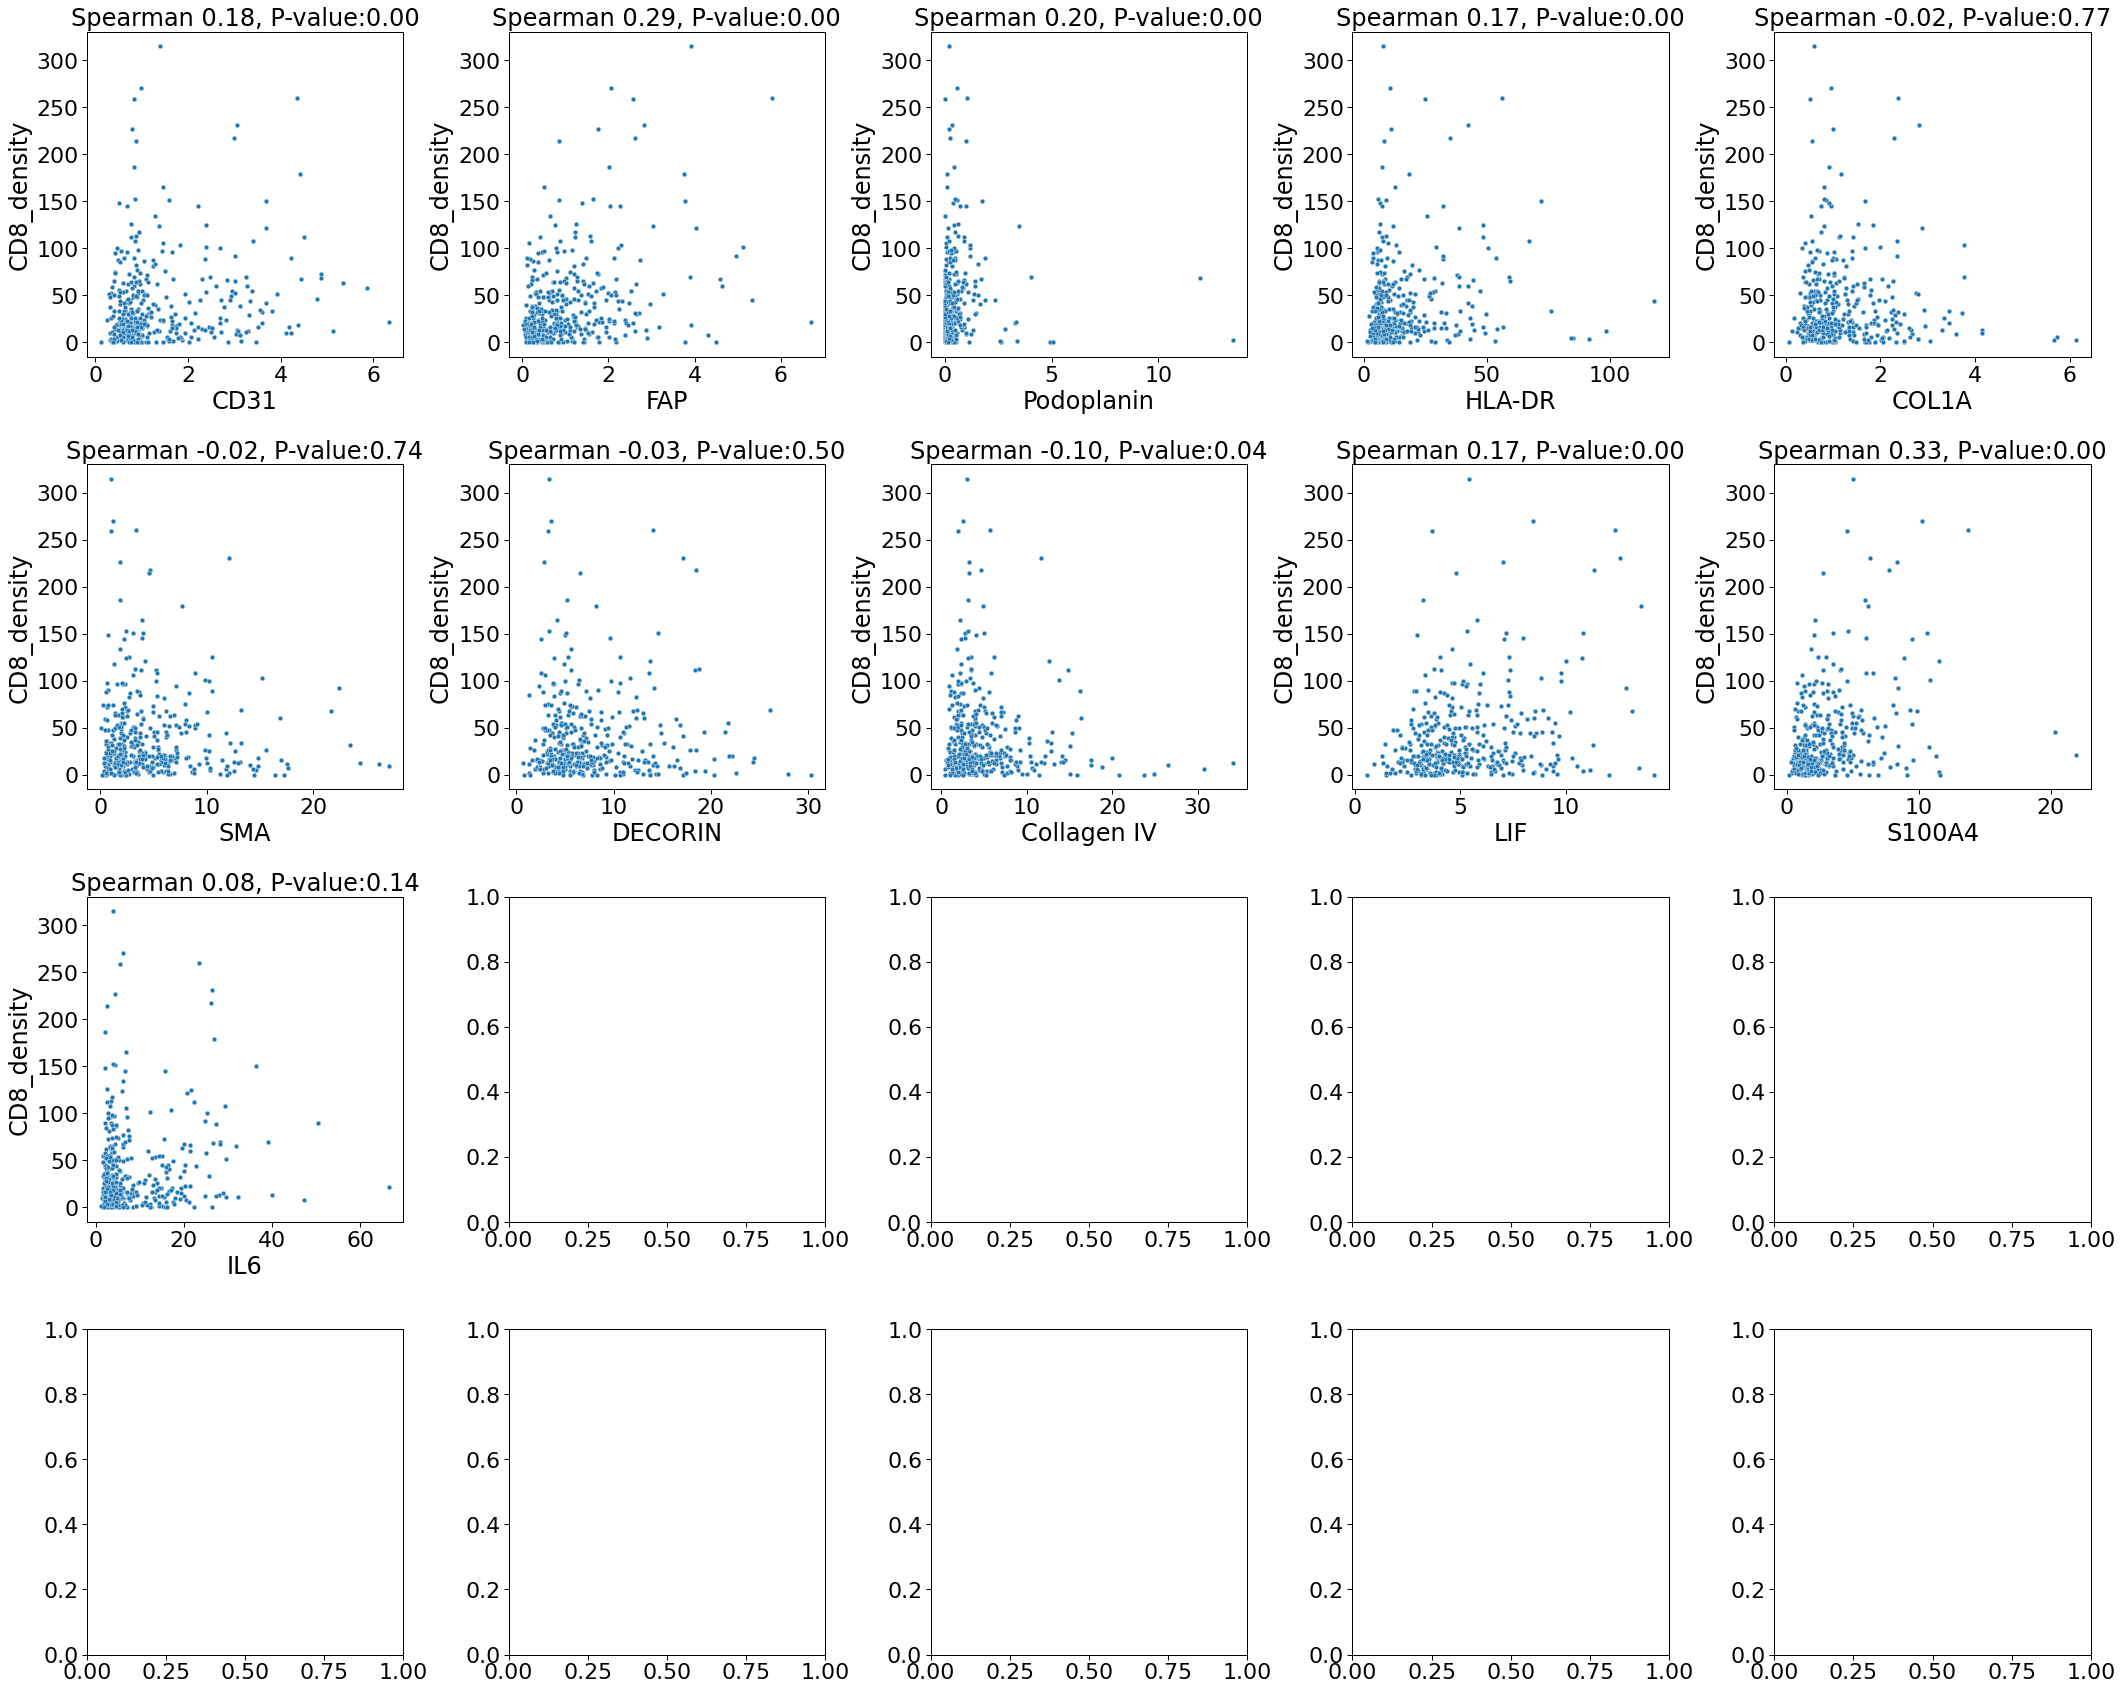

In [121]:
filtered_region_df['CD8_density'] = filtered_region_df['Num CD8+'] / filtered_region_df['Area µm^2'] * 100000

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30,24))
axs = axs.flatten()

for i, marker in enumerate(marker_cols):

    sns.scatterplot(filtered_region_df, x = marker, y = 'CD8_density', ax=axs[i])
    stat, p_val = stats.spearmanr(filtered_region_df[marker], filtered_region_df['CD8_density'])
    axs[i].set_title(f'Spearman {stat:.2f}, P-value:{p_val:.2f}')

plt.tight_layout()
plt.show()

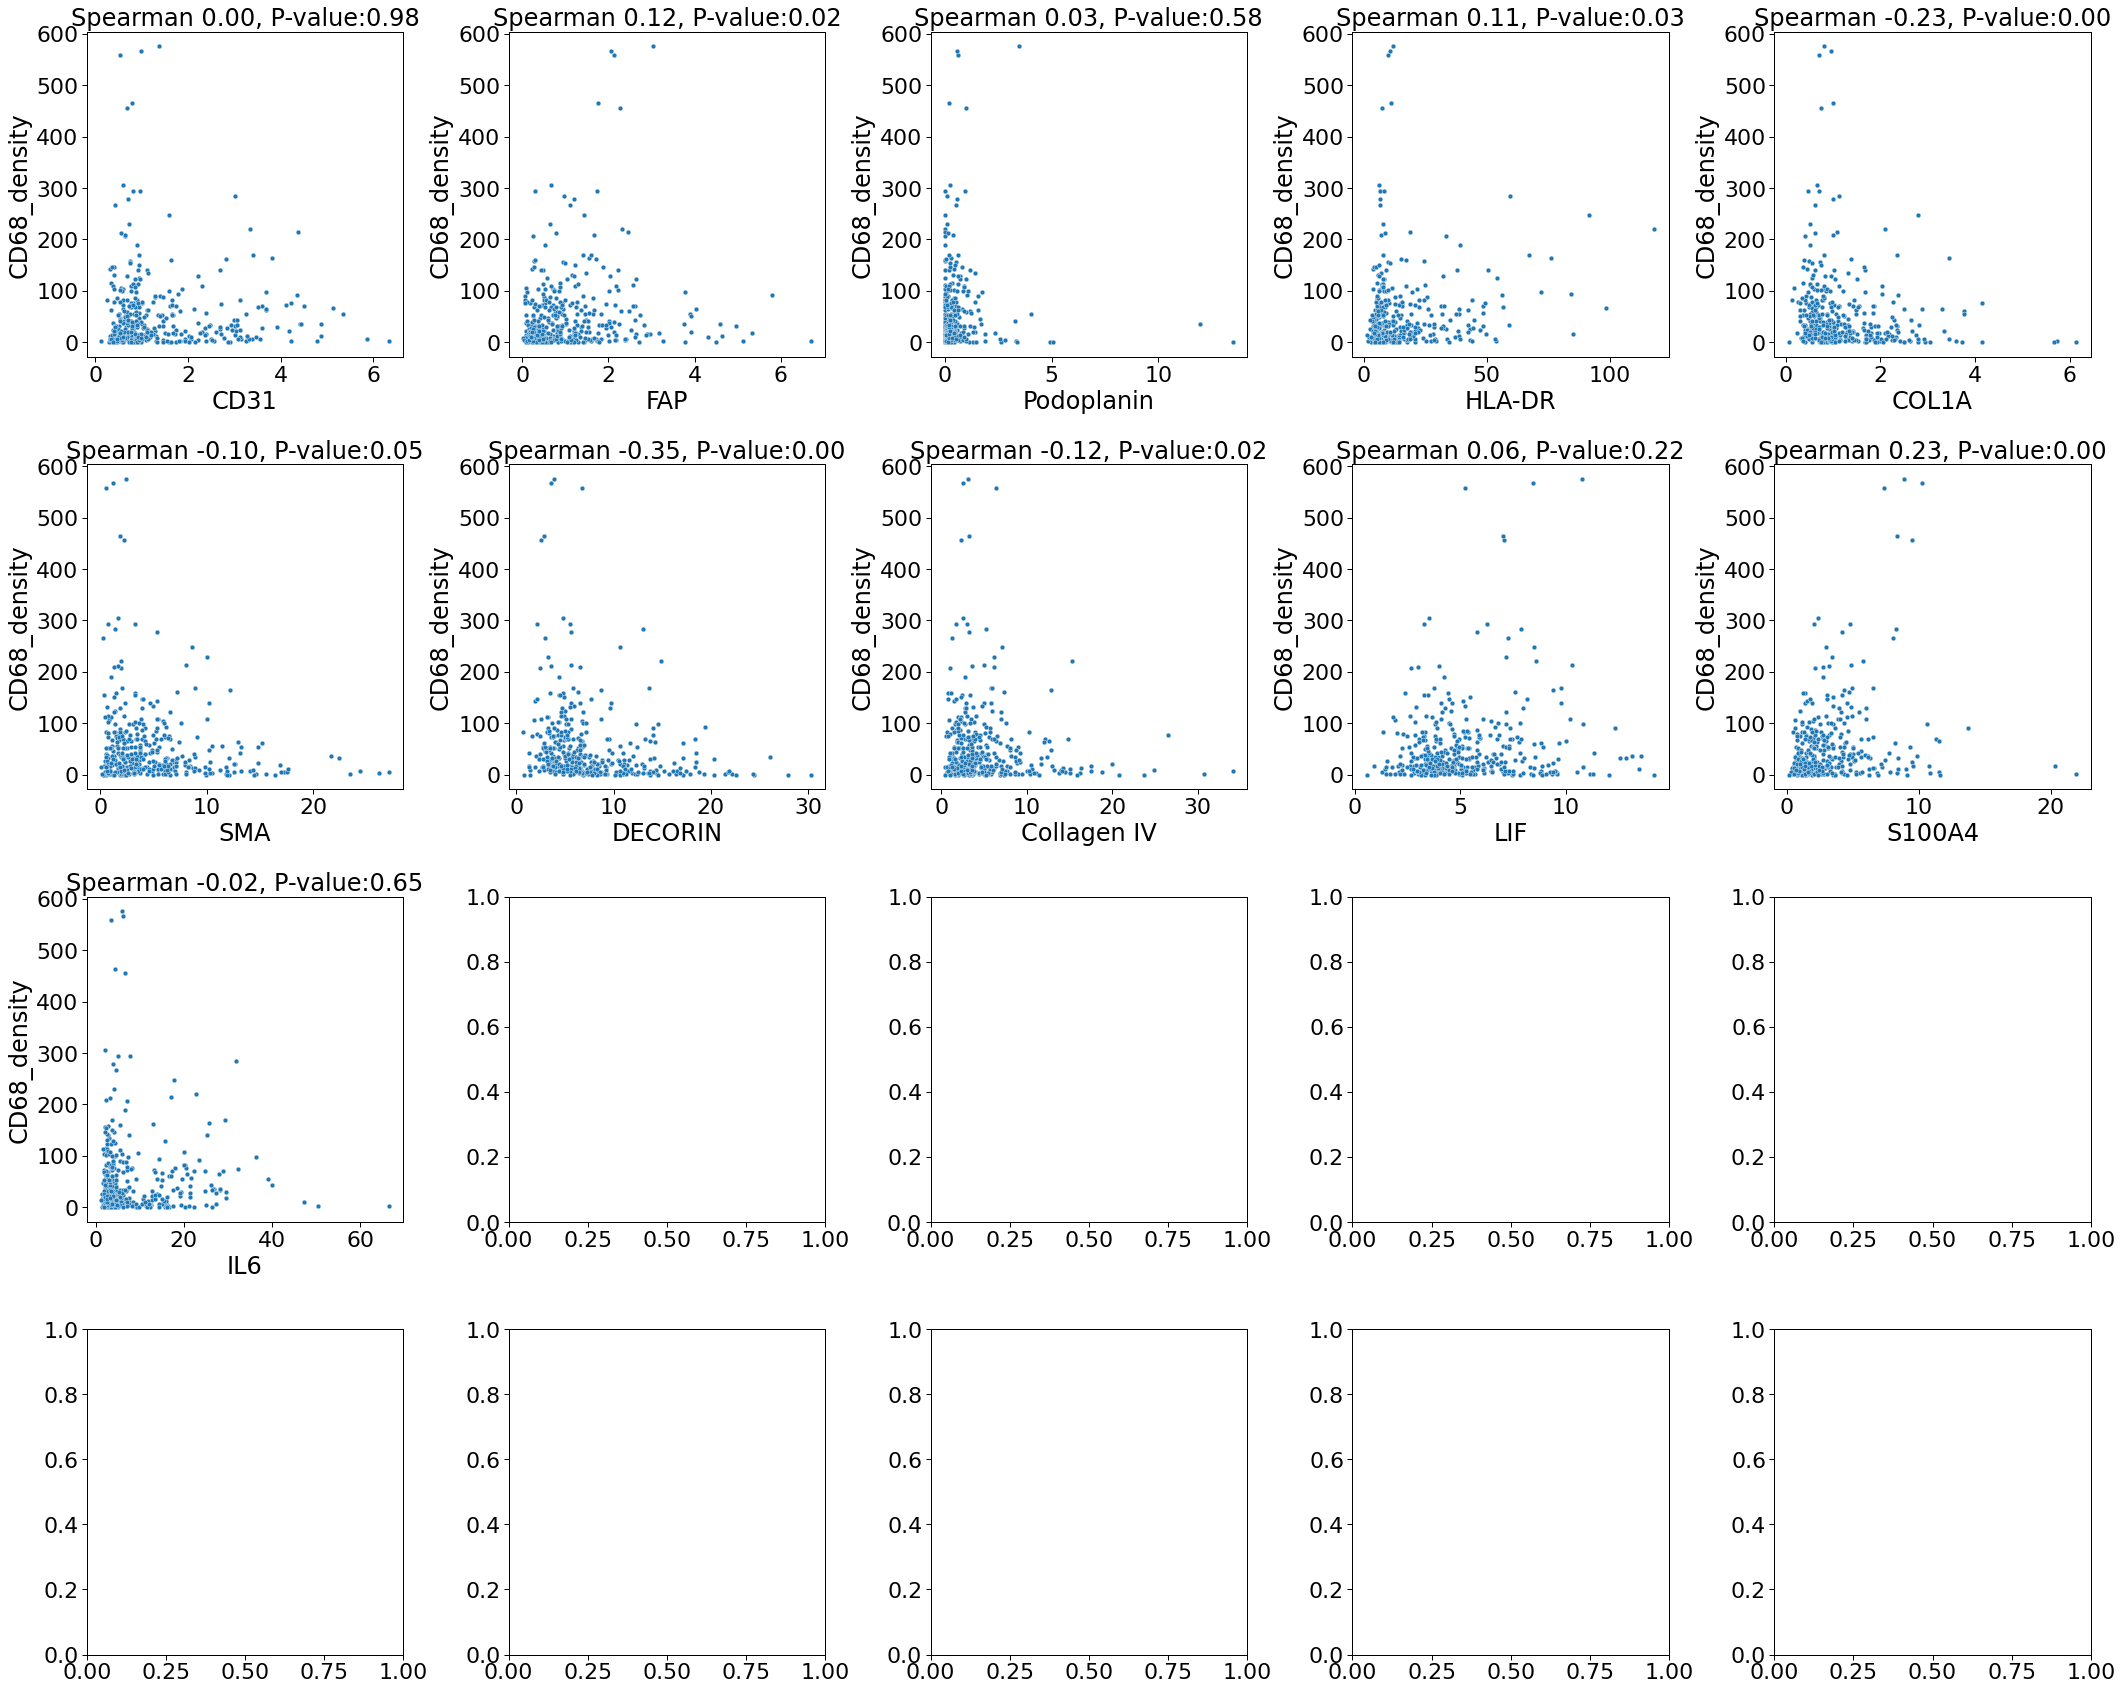

In [122]:
filtered_region_df['CD68_density'] = filtered_region_df['Num CD68+'] / filtered_region_df['Area µm^2'] * 100000

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30,24))
axs = axs.flatten()

for i, marker in enumerate(marker_cols):

    sns.scatterplot(filtered_region_df, x = marker, y = 'CD68_density', ax=axs[i])
    stat, p_val = stats.spearmanr(filtered_region_df[marker], filtered_region_df['CD68_density'])
    axs[i].set_title(f'Spearman {stat:.2f}, P-value:{p_val:.2f}')

plt.tight_layout()
plt.show()

In [123]:
import numpy as np
from statsmodels.stats.multitest import multipletests

def correlation_matrix_with_pvals(data, columns=None, method='pearson', 
                                  alpha=0.05, correction_method='fdr_bh'):
    if columns is None:
        numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
        df = data[numeric_cols]
    else:
        df = data[columns]
    
    n = df.shape[1]
    
    corr_df = pd.DataFrame(np.zeros((n, n)), index=df.columns, columns=df.columns)
    pval_df = pd.DataFrame(np.zeros((n, n)), index=df.columns, columns=df.columns)
    
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns):
            if method == 'pearson':
                corr, pval = stats.pearsonr(df[col1].dropna(), df[col2].dropna())
            elif method == 'spearman':
                corr, pval = stats.spearmanr(df[col1].dropna(), df[col2].dropna())
            elif method == 'kendall':
                corr, pval = stats.kendalltau(df[col1].dropna(), df[col2].dropna())
            else:
                raise ValueError("Method must be 'pearson', 'spearman', or 'kendall'")
            
            corr_df.iloc[i, j] = corr
            pval_df.iloc[i, j] = pval
    
    p_vals_flat = []
    for i in range(n):
        for j in range(n):
            if i != j:  # Exclude diagonal
                p_vals_flat.append(pval_df.iloc[i, j])
    
    if len(p_vals_flat) > 0:  
        reject, pvals_corrected, _, _ = multipletests(p_vals_flat, alpha=alpha, method=correction_method)
        
        adjusted_pval_df = pd.DataFrame(np.eye(n), index=df.columns, columns=df.columns)
        
        # Fill adjusted p-values
        k = 0
        for i in range(n):
            for j in range(n):
                if i != j:
                    adjusted_pval_df.iloc[i, j] = pvals_corrected[k]
                    k += 1
    else:
        adjusted_pval_df = pval_df.copy()
    
    # Create annotation DataFrame with significance indicators
    annot_df = corr_df.copy().round(2).astype(str)
    
    for i in range(n):
        for j in range(n):
            corr_str = annot_df.iloc[i, j]
            
            if i == j:  
                annot_df.iloc[i, j] = ""
            else:
                if adjusted_pval_df.iloc[i, j] <= 0.001:
                    annot_df.iloc[i, j] = "*"
                    # annot_df.iloc[i, j] = corr_str + "***"
                elif adjusted_pval_df.iloc[i, j] <= 0.01:
                    annot_df.iloc[i, j] = "*"
                    # annot_df.iloc[i, j] = corr_str + "**"
                elif adjusted_pval_df.iloc[i, j] <= 0.05:
                    annot_df.iloc[i, j] = "*"
                    # annot_df.iloc[i, j] = corr_str + "*"
                else:
                    annot_df.iloc[i, j] = ""
    
    return corr_df, annot_df, pval_df, adjusted_pval_df

In [124]:
filtered_region_df['CD4_density'] = filtered_region_df['Num CD4+'] / filtered_region_df['Area µm^2'] * 100000
filtered_region_df['CD20_density'] = filtered_region_df['Num CD20+'] / filtered_region_df['Area µm^2'] * 100000
filtered_region_df['CD68_density'] = filtered_region_df['Num CD68+'] / filtered_region_df['Area µm^2'] * 100000
filtered_region_df['CD8_density'] = filtered_region_df['Num CD8+'] / filtered_region_df['Area µm^2'] * 100000
# filtered_region_df = filtered_region_df.merge(all_region_df[['core', 'Num Endothelium']], on='core')


In [125]:
# corr_df, annot_df, pval_df, adjusted_pval_df = correlation_matrix_with_pvals(filtered_region_df, columns=['CD105', 'CD31',
#        'FAP', 'Podoplanin', 'HLA-DR', 'COL1A', 'PDL1', 'CXCL12', 'PD-1',
#        'SMA', 'DECORIN', 'CXCL1', 'Collagen IV', 'LIF', 'S100A4', 'PDGFR',
#        'CTGF', 'IL6', 'CXCR4', 'CD8_density', 'CD68_density',
#        'CD4_density', 'CD20_density'])

corr_df, annot_df, pval_df, adjusted_pval_df = correlation_matrix_with_pvals(filtered_region_df, columns=['CD31',
       'Podoplanin', 'HLA-DR', 'COL1A', 'SMA', 'DECORIN', 'Collagen IV', 'LIF', 'S100A4', 
       'IL6', 'CD8_density', 'CD68_density', 'CD4_density', 'CD20_density'], method='spearman')

corr_df = corr_df[[col for col in corr_df.columns if col in marker_cols]]
corr_df = corr_df[corr_df.index.isin(['CD8_density', 'CD68_density', 'CD4_density', 'CD20_density'])]

annot_df = annot_df[[col for col in annot_df.columns if col in marker_cols]]
annot_df = annot_df[annot_df.index.isin(['CD8_density', 'CD68_density', 'CD4_density', 'CD20_density'])]

In [126]:
corr_df

,CD31,Podoplanin,HLA-DR,COL1A,SMA,DECORIN,Collagen IV,LIF,S100A4,IL6
CD8_density,0.181418,0.202545,0.168696,-0.015046,-0.016763,-0.034895,-0.104075,0.171378,0.332207,0.075506
CD68_density,0.001043,0.028346,0.108202,-0.234092,-0.101194,-0.347919,-0.121287,0.062953,0.234128,-0.023071
CD4_density,0.191934,-0.014428,0.155518,-0.045057,-0.014340,0.004237,0.052350,0.158027,0.247586,0.054693
CD20_density,0.051107,0.030301,0.066931,-0.248032,-0.087681,-0.175003,-0.158923,-0.033620,0.131678,-0.137638


In [127]:
adjusted_pval_df

,CD31,Podoplanin,HLA-DR,COL1A,SMA,DECORIN,Collagen IV,LIF,S100A4,IL6,CD8_density,CD68_density,CD4_density,CD20_density
CD31,1.000000e+00,3.610813e-01,2.148574e-63,6.294478e-11,4.942842e-17,1.747846e-15,5.449914e-19,1.706427e-26,1.795830e-12,2.136817e-58,6.048412e-04,9.837906e-01,2.705468e-04,3.676002e-01
Podoplanin,3.610813e-01,1.000000e+00,2.969102e-07,4.506194e-06,9.208848e-02,9.985424e-03,2.072920e-04,3.216763e-07,1.867633e-17,4.914528e-02,1.170375e-04,6.291305e-01,7.974855e-01,6.083893e-01
HLA-DR,2.148574e-63,2.969102e-07,1.000000e+00,5.185515e-08,1.420876e-09,8.872352e-18,7.946109e-09,6.929426e-19,4.811960e-06,3.042902e-72,1.463325e-03,4.758230e-02,3.434746e-03,2.358407e-01
COL1A,6.294478e-11,4.506194e-06,5.185515e-08,1.000000e+00,1.788954e-10,1.718344e-50,3.251805e-18,1.458240e-27,9.820131e-11,1.070877e-12,7.974855e-01,6.966714e-06,4.320634e-01,1.895438e-06
SMA,4.942842e-17,9.208848e-02,1.420876e-09,1.788954e-10,1.000000e+00,5.063249e-08,7.996121e-06,7.711147e-34,1.575203e-01,3.863416e-23,7.872441e-01,6.344598e-02,7.974855e-01,1.115208e-01
DECORIN,1.747846e-15,9.985424e-03,8.872352e-18,1.718344e-50,5.063249e-08,1.000000e+00,4.781224e-23,1.745569e-16,7.275129e-06,3.976469e-13,5.578134e-01,7.646680e-12,9.445896e-01,9.602368e-04
Collagen IV,5.449914e-19,2.072920e-04,7.946109e-09,3.251805e-18,7.996121e-06,4.781224e-23,1.000000e+00,3.157354e-12,1.289022e-16,2.969102e-07,5.627848e-02,2.480111e-02,3.610813e-01,2.829776e-03
LIF,1.706427e-26,3.216763e-07,6.929426e-19,1.458240e-27,7.711147e-34,1.745569e-16,3.157354e-12,1.000000e+00,1.180284e-24,6.518028e-38,1.228709e-03,2.664506e-01,2.955205e-03,5.686186e-01
S100A4,1.795830e-12,1.867633e-17,4.811960e-06,9.820131e-11,1.575203e-01,7.275129e-06,1.289022e-16,1.180284e-24,1.000000e+00,9.806007e-07,7.459950e-11,6.966714e-06,1.941519e-06,1.419451e-02
IL6,2.136817e-58,4.914528e-02,3.042902e-72,1.070877e-12,3.863416e-23,3.976469e-13,2.969102e-07,6.518028e-38,9.806007e-07,1.000000e+00,1.754492e-01,6.991734e-01,3.428130e-01,1.019377e-02


In [128]:
corr_df.index = ['CD8+ T-cell', 'CD68+ Macrophage', 'CD4+ T-cell', 'CD20+ B-cell']
corr_df.index.name = 'Density'
annot_df.index = ['CD8+ T-cell', 'CD68+ Macrophage', 'CD4+ T-cell', 'CD20+ B-cell']
annot_df.index.name = 'Density'


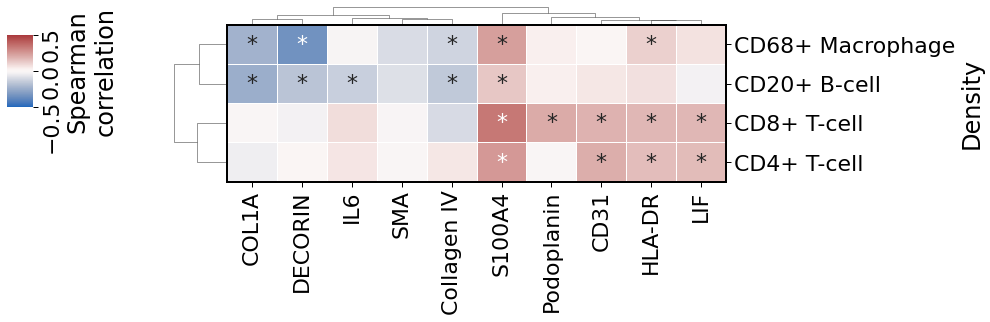

In [129]:
g = sns.clustermap(corr_df,
               annot=annot_df,
               fmt="",
               annot_kws={'fontsize':22},
               linewidth=.5,
               dendrogram_ratio=(.1, .1),
               cbar_kws={'label':'Spearman\ncorrelation'},
               cbar_pos=(-.16, .65, .03, .2),
               cmap='vlag',
               vmin=-0.5, vmax=0.5,
               figsize=(12,5))

n_rows, n_cols = corr_df.shape
g.ax_heatmap.collections[0].set_linewidth(.5)


rect = Rectangle(
    xy=(0, 0),  # Lower left corner
    width=n_cols,
    height=n_rows,
    fill=False,
    edgecolor='black',
    linewidth=2,
    clip_on=False
)

g.ax_heatmap.add_patch(rect)
g.cax.tick_params(labelrotation=90)

# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_vs_immune_corr_spearman_rot_cbar_labs.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
# plt.savefig('/nfs/home/users/krakovic/sharedscratch/notebooks/latticea_he/final_figures/codex/region_data/plots/stroma_region_vs_immune_corr_spearman_rot_cbar_labs.tiff', dpi=300, bbox_inches='tight', pad_inches=0.1)